# Import libraries

In [ ]:
#global

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from tabulate import tabulate



#scikit learn
##preparation/transformation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder #si besoin, si on a des variables catégorielles


##regression

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score



#metrics

from sklearn.metrics import r2_score


#valdidation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Functions

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Import data

Charger et nettoyer les données

In [ ]:
#import data

from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv
Saving dtypes.csv to dtypes.csv


In [ ]:
df_type = pd.read_csv('dtypes.csv', sep='~')
variable_types = dict(zip(df_type.column, df_type.type))

df = pd.read_csv('data.csv', sep="~", dtype=variable_types, na_values='I am null') 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# EDA

In [ ]:
df_categoric=df.select_dtypes('object') #selectionner les variables categorielles
df_numeric=df.select_dtypes('number')  #selectionner les variables numériques (float64 et int64)


## Univariate analysis

### Categorical

In [ ]:
df_categoric.nunique()

Country    183
Status       2
dtype: int64

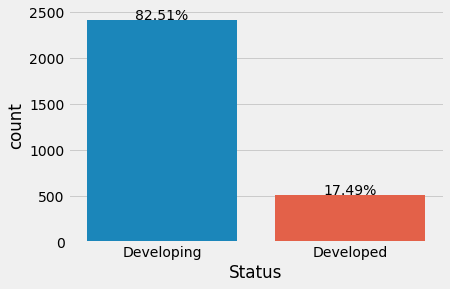

In [ ]:
plt.style.use('fivethirtyeight')
s = sns.countplot(x = 'Status',data = df_categoric)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=14)

### Numerical

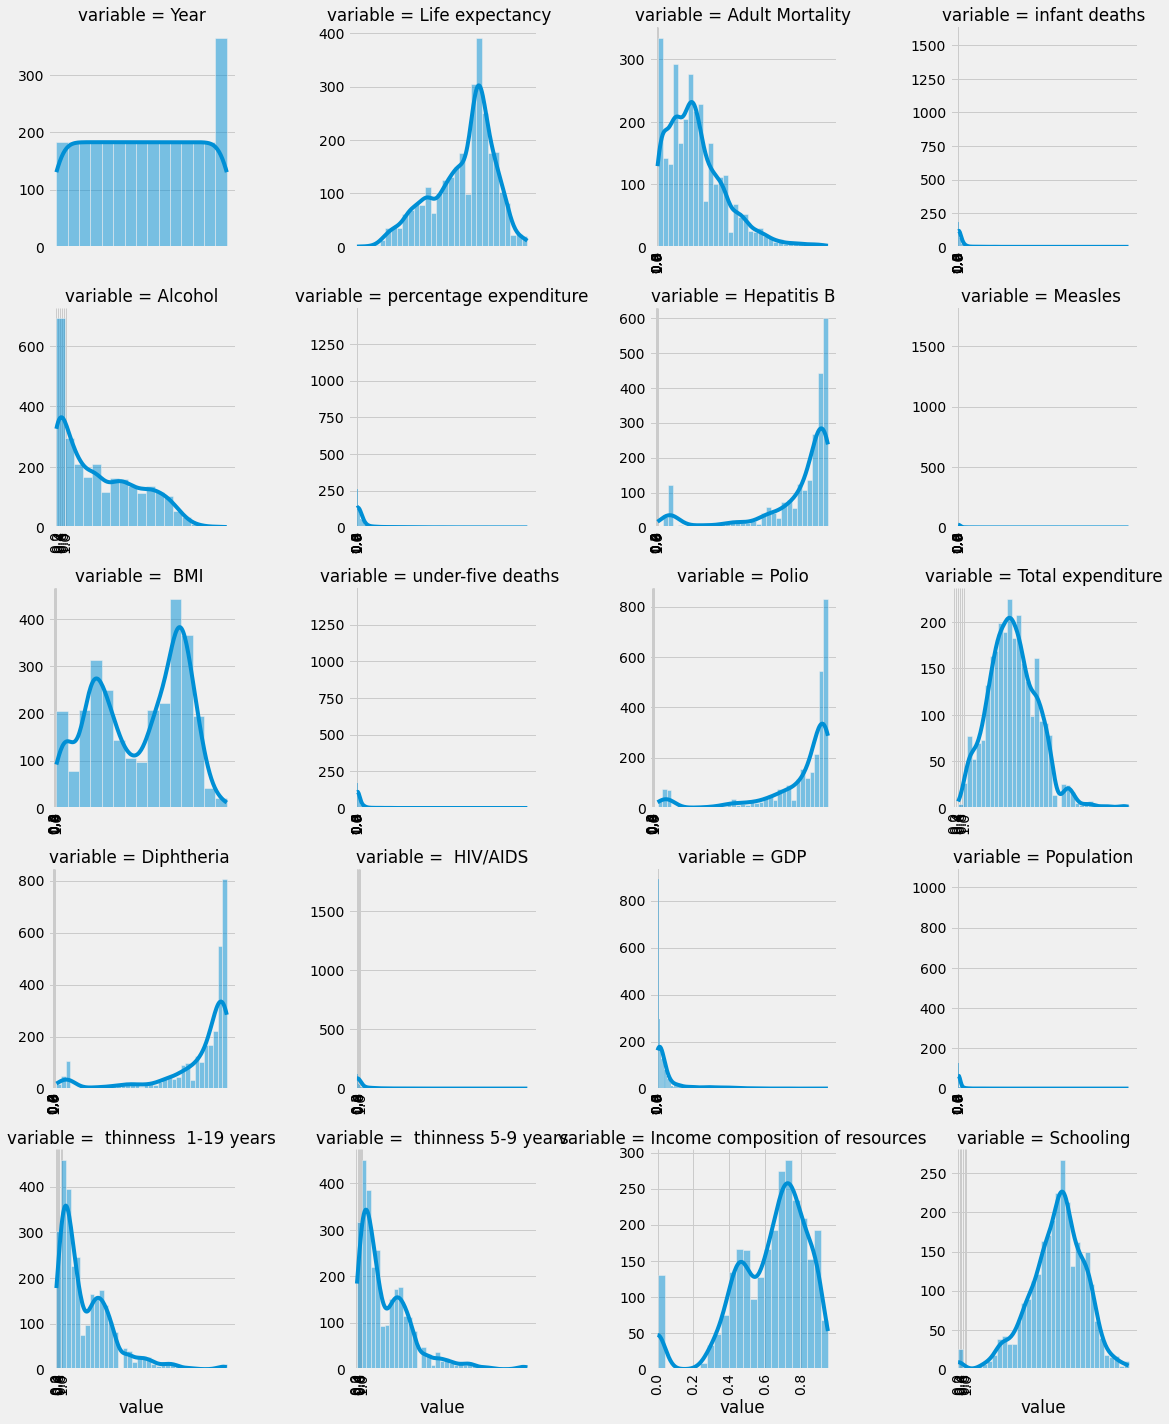

In [ ]:
#histplot

NumFacetGrid = sns.FacetGrid(pd.melt(df_numeric), col='variable',sharex=False, sharey=False, height=4,col_wrap=4)
NumFacetGrid.set_xticklabels(rotation=90)
countPlot=NumFacetGrid.map(sns.histplot,'value', kde=True)
plt.show()

## Bivariate analysis

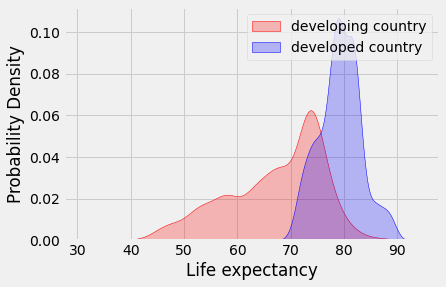

In [ ]:

sns.kdeplot(df.loc[(df['Status']== 'Developing'),
            'Life expectancy '], color='r', shade=True, Label='developing country')
  

sns.kdeplot(df.loc[(df['Status']== 'Developed'),
            'Life expectancy '], color='b', shade=True, Label='developed country')

plt.xlabel('Life expectancy')
plt.ylabel('Probability Density')
plt.legend()

In [ ]:
#on ordonne les pays par espérance de vie, de la plus grande à la plus peite

df.sort_values(by=['Life expectancy '], ascending=False)['Country'].to_frame()

,Country
2424,Spain
1910,Norway
936,France
913,Finland
2504,Sweden
...,...
2299,Sierra Leone
2300,Sierra Leone
2302,Sierra Leone
2303,Sierra Leone


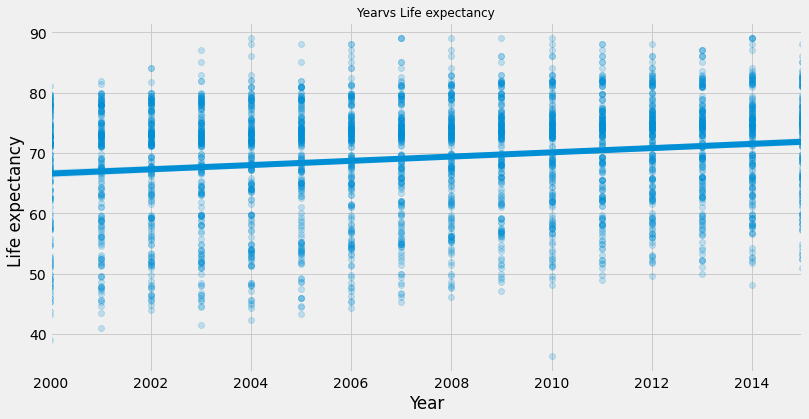

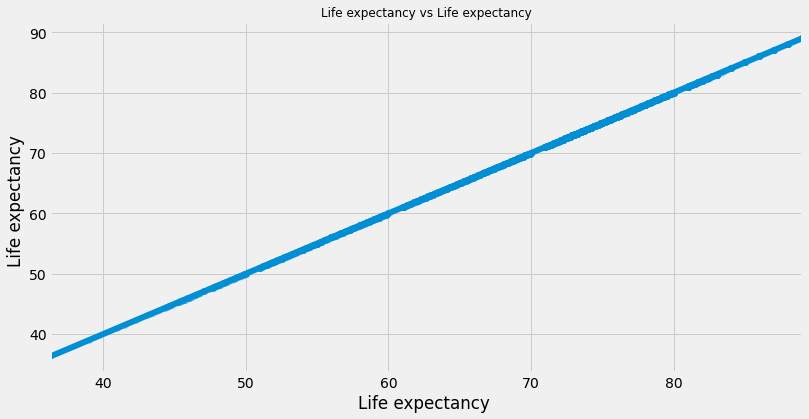

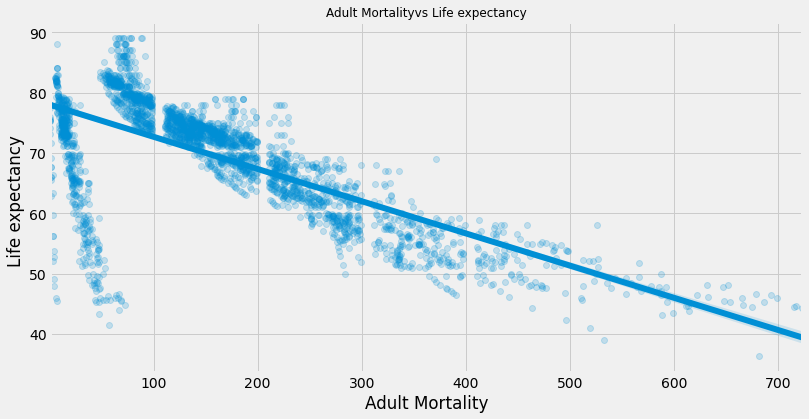

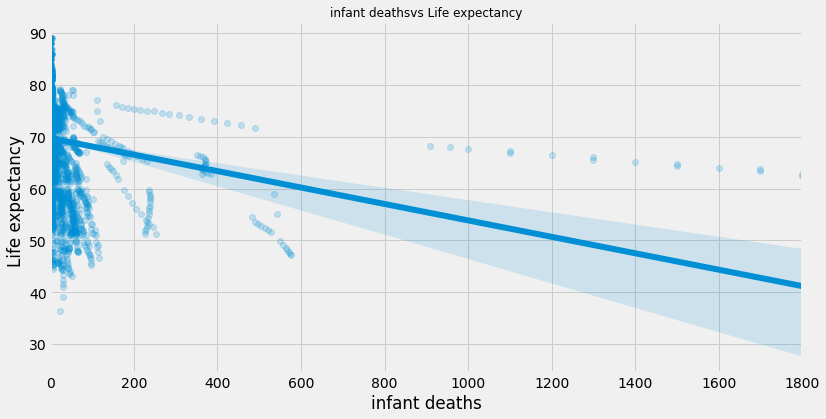

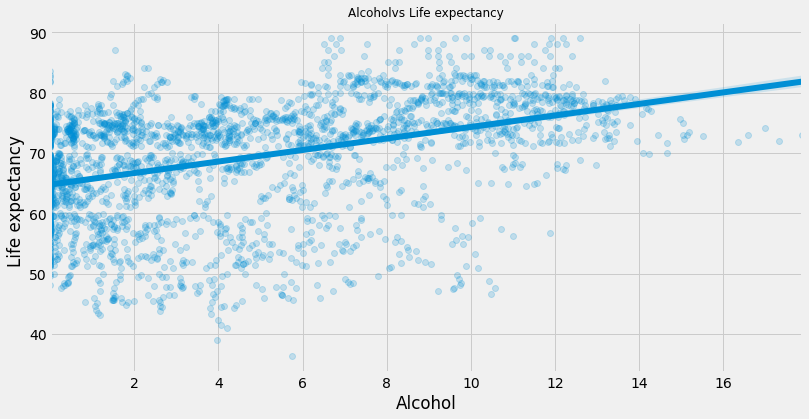

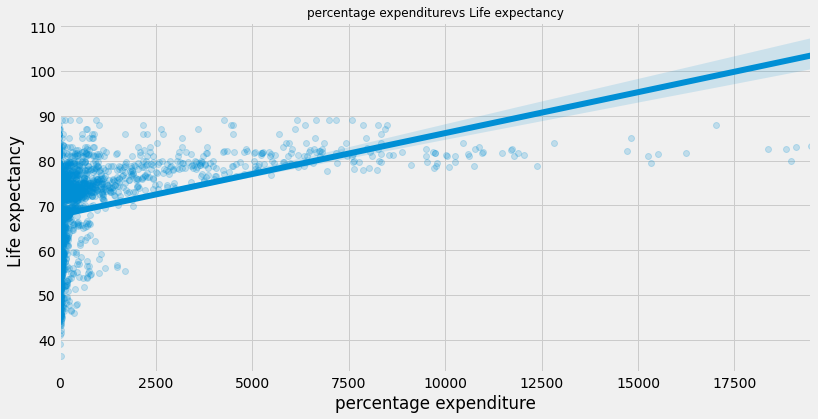

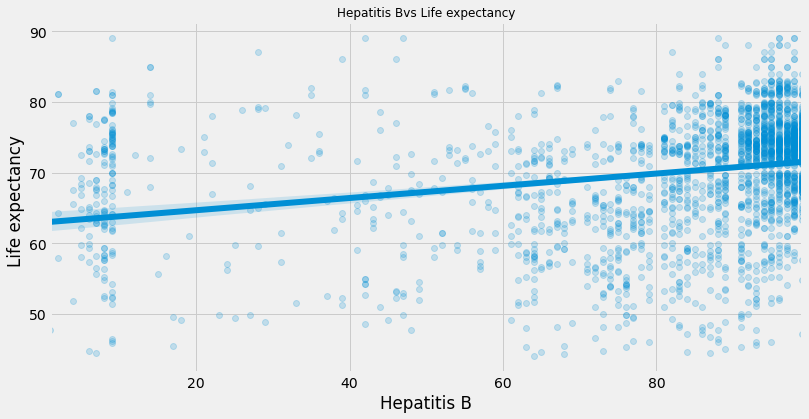

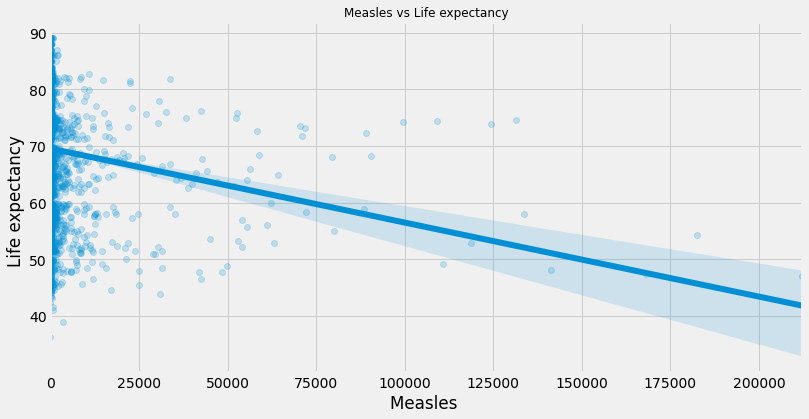

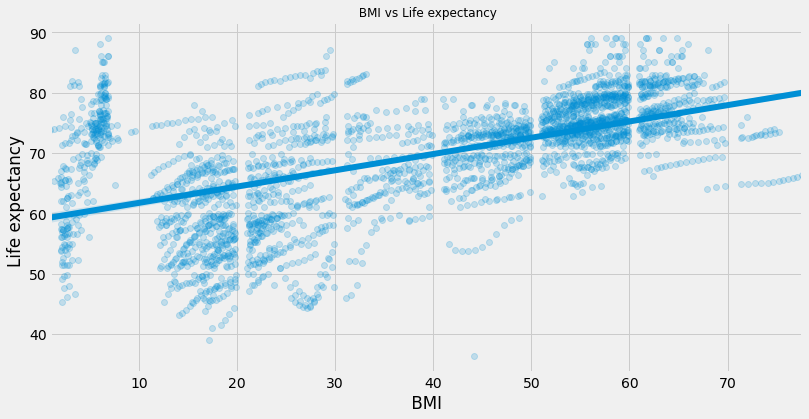

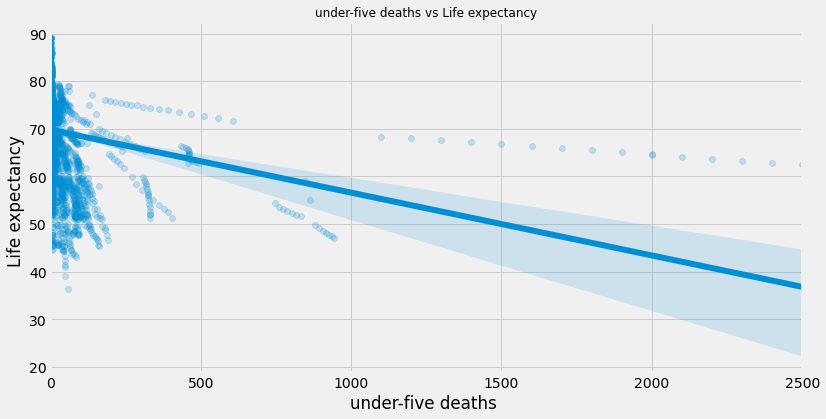

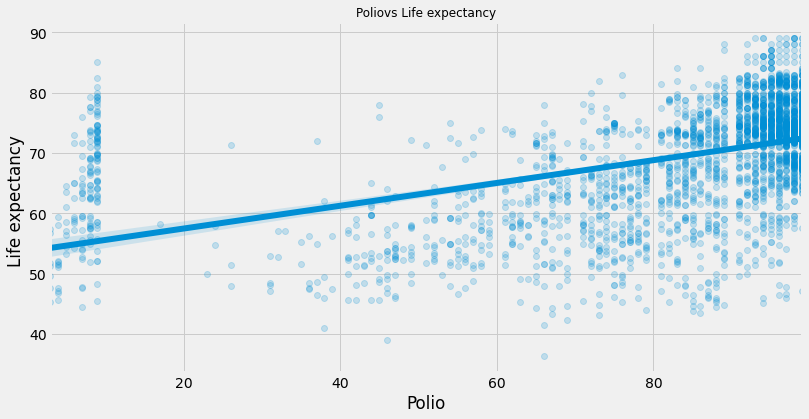

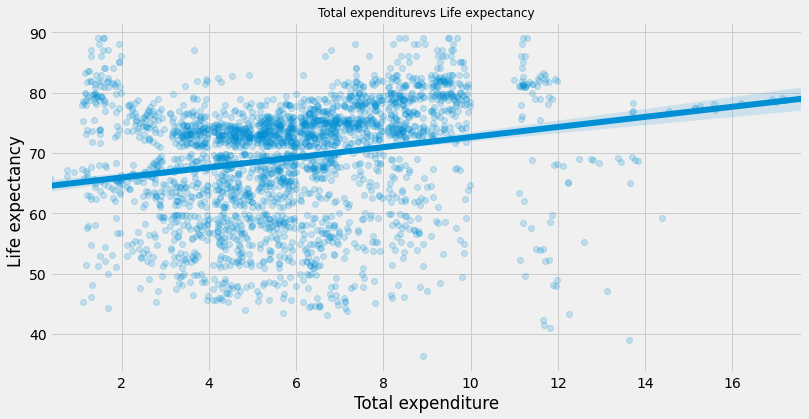

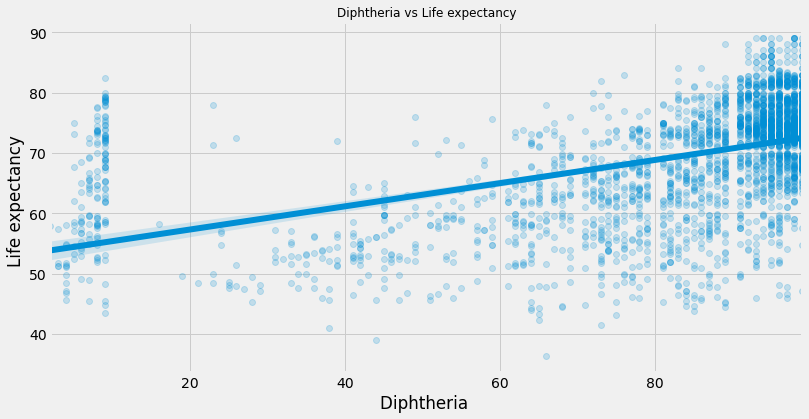

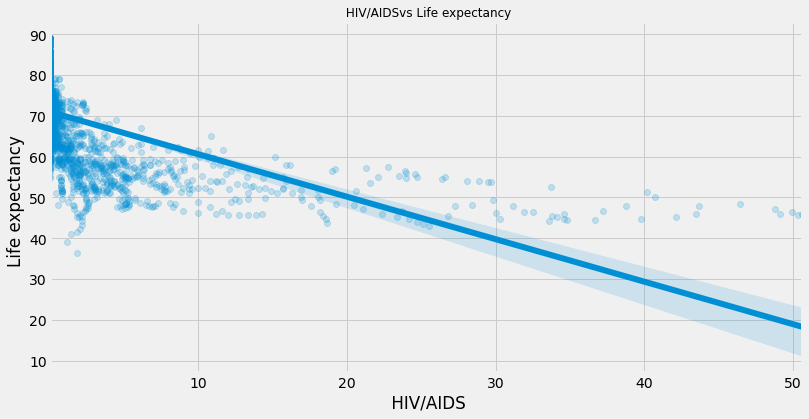

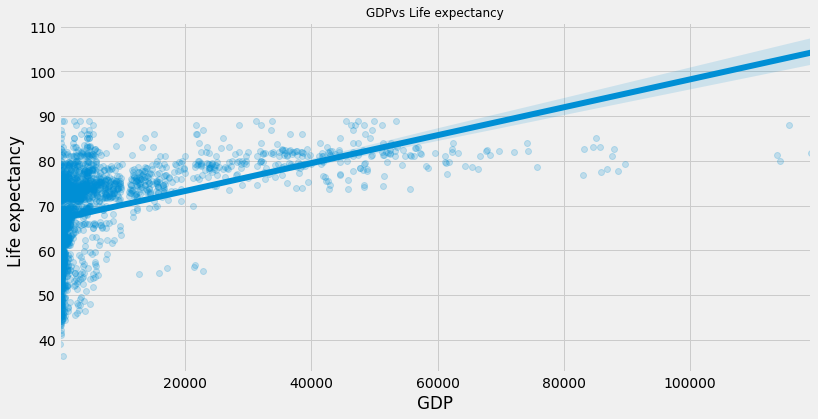

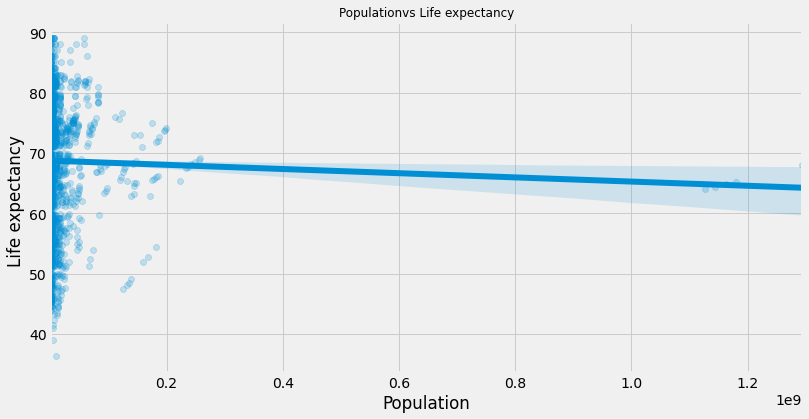

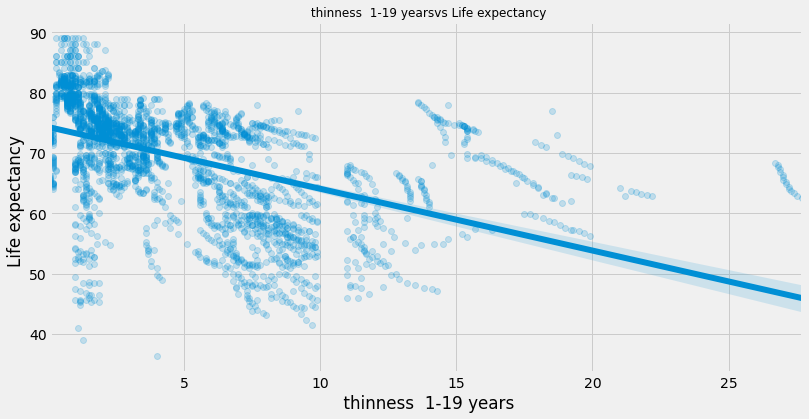

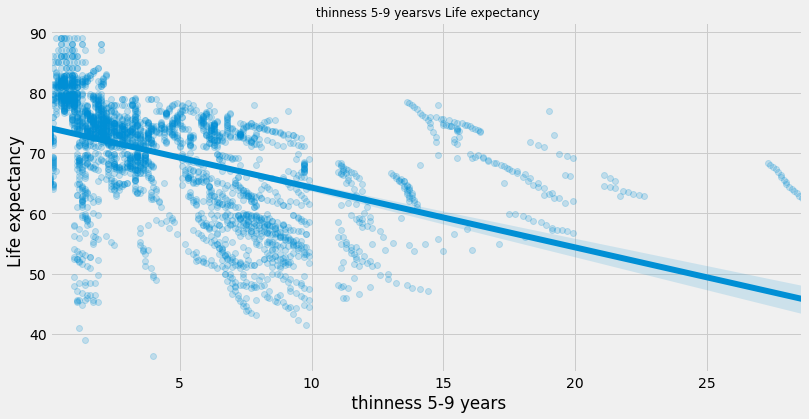

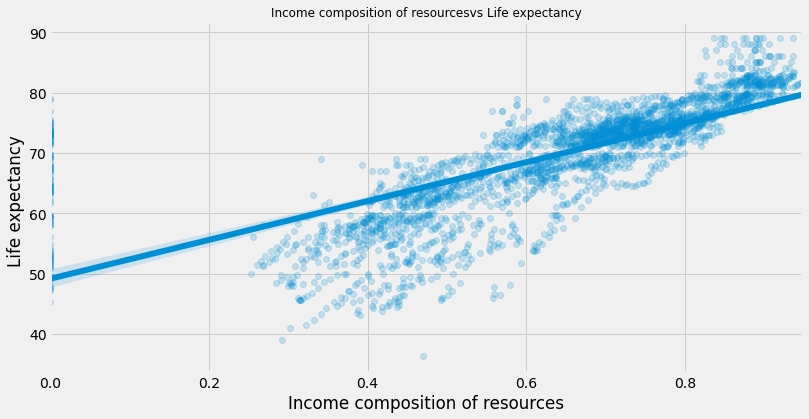

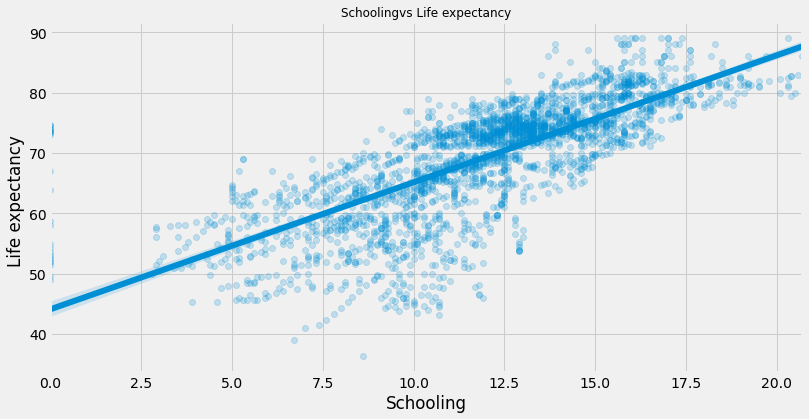

In [ ]:
for column in df_numeric.columns:
  plt.figure(figsize = (12,6))
  sns.regplot(data=df_numeric, x = '%s' %column, y='Life expectancy ', scatter_kws={'alpha':0.2})
  plt.title('%s' %column + 'vs Life expectancy', fontsize = 12)
  plt.show()

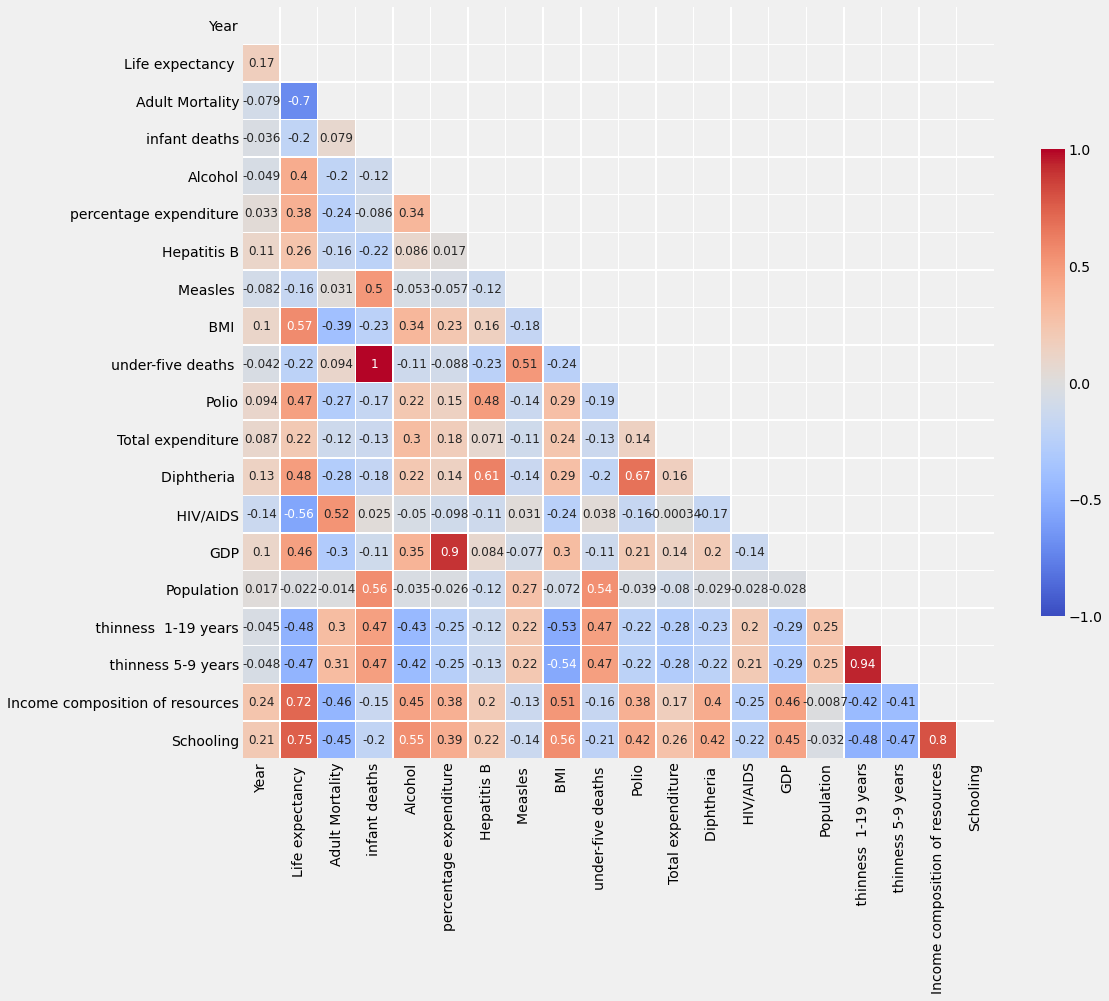

In [ ]:
corr=df_numeric.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 20))

heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})


ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Missing values and encoding

## Missing values

In [ ]:
#Valeurs manquantes

mis_val = df.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        


mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

# Print some summary information
print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
mis_val_table_ren_columns

The dataframe has 22 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Population,644,22.0
Hepatitis B,553,18.9
GDP,443,15.1
Total expenditure,226,7.7
Alcohol,193,6.6
Income composition of resources,160,5.5
Schooling,160,5.5
BMI,32,1.1
thinness 1-19 years,32,1.1
thinness 5-9 years,32,1.1


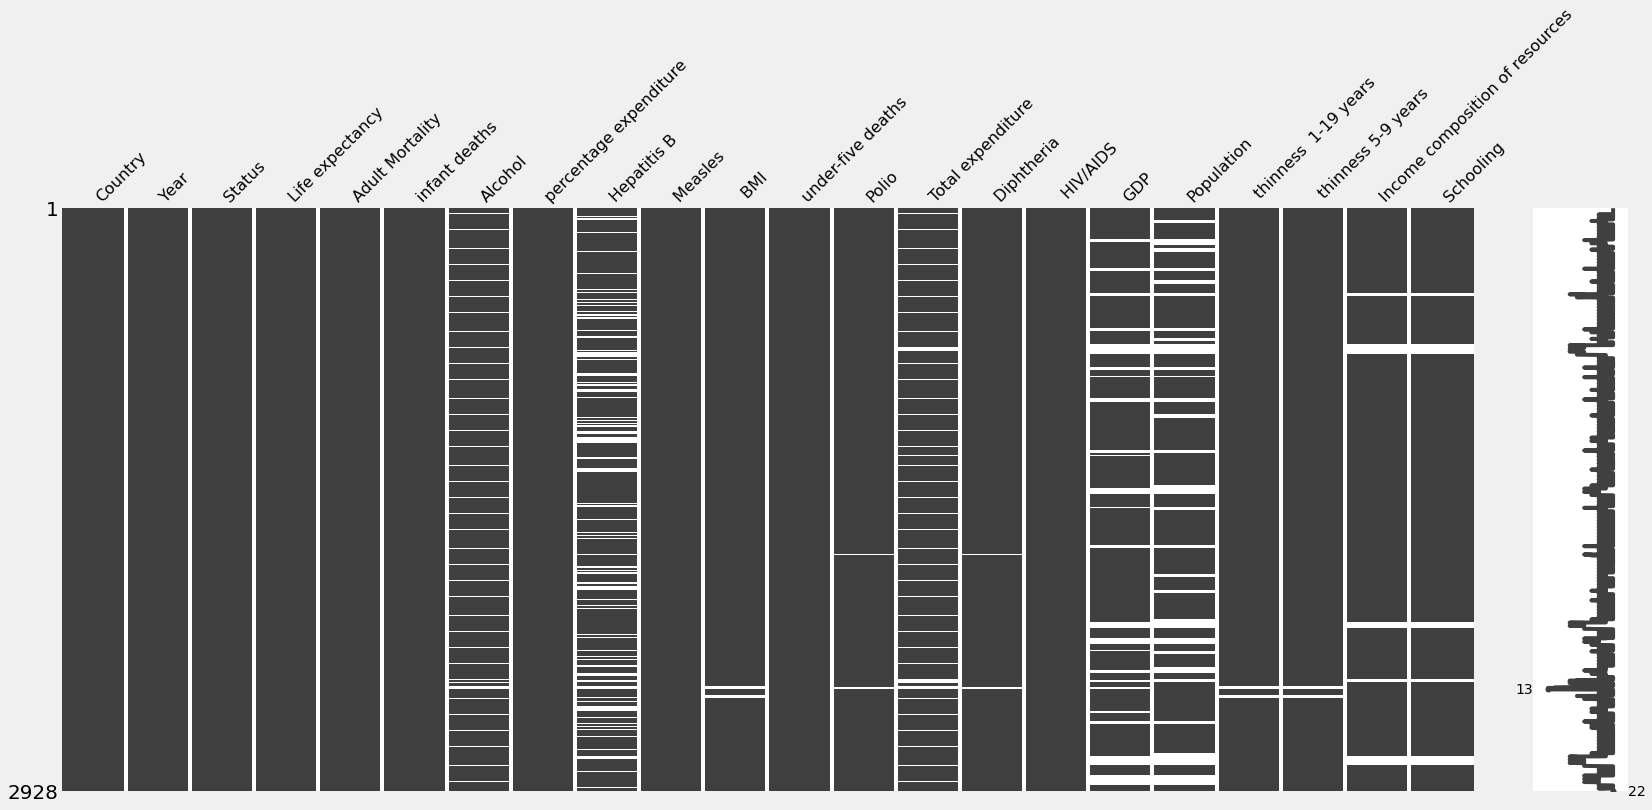

In [ ]:
msno.matrix(df) #afficher les valeurs manquantes du dataset , par colonne et "emplacement"

In [ ]:
#Pour les variables catégorielles, on remplace les valeurs manquantes par le mode (la valeur la plus fréquente) de la colonne

for column in df_categoric.columns:
    df_categoric[column].fillna(df_categoric[column].mode()[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#pour les variables numériques, on remplace les valeurs manquantes par la moyenne de la colonne

fill_mean = lambda col: col.fillna(col.mean())
df_numeric=df_numeric.apply(fill_mean, axis=0)

In [ ]:
#on créée les dataframe de features 

var_feature = [o for o in df_numeric.columns if o!='Life expectancy ']
X_numeric = df_numeric[var_feature]
X_categoric=df_categoric

In [ ]:
#On retire les variables qui sont linéairement dépendantes entre elles (on en garde une sur deux)
#on fixe un seuil de 0,85 pour le coefficient de corrélation de pearson

X_numeric_cleaned=X_numeric.drop(columns=['infant deaths', 'percentage expenditure', ' thinness  1-19 years'])


#on encode nos variables catégoriques avec OrdinalEncoder()

enc = OrdinalEncoder()
X_categoric_encoded=pd.DataFrame(enc.fit_transform(X_categoric), columns=X_categoric.columns)

#finalement, on obtient notre matrice finale de features

X=pd.concat([X_categoric_encoded,X_numeric],axis=1)

# Modeling

In [ ]:
y=df_numeric['Life expectancy ']

#création des ensembles train et test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print('Training set shape: ', X_train.shape)
print('Testing set shape: ', X_test.shape)


Training set shape:  (2049, 21)
Testing set shape:  (879, 21)


On choisit d'entraîner une régression Ridge pour le modèle linéaire pénalisé/régularisé 

In [ ]:
reg = Ridge()
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

print("Ridge regression:\n================================================")

print('- Le score R2 sur notre ensemble test est:', r2_score(y_test,y_pred))
print('\n- Le MAPE sur notre ensemble test est:', mean_absolute_percentage_error(y_test,y_pred),'%' )
print('\n\n- Le score R2 sur notre ensemble train est:', r2_score(y_train,y_train_pred))
print('\n- Le MAPE sur notre ensemble train est:', mean_absolute_percentage_error(y_train,y_train_pred),"%")

Ridge regression:
- Le score R2 sur notre ensemble test est: 0.8139295618194988

- Le MAPE sur notre ensemble test est: 4.7640667680007756 %


- Le score R2 sur notre ensemble train est: 0.8092008378644029

- Le MAPE sur notre ensemble train est: 4.721074376966343 %


In [ ]:
reg = RandomForestRegressor()
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)



print("Random Forest:\n================================================")
print('- Le score R2 sur notre ensemble test est:', r2_score(y_test,y_pred))
print('\n- Le MAPE sur notre ensemble test est:', mean_absolute_percentage_error(y_test,y_pred),'%' )
print('\n\n- Le score R2 sur notre ensemble train est:', r2_score(y_train,y_train_pred))
print('\n- Le MAPE sur notre ensemble train est:', mean_absolute_percentage_error(y_train,y_train_pred),"%")

Random Forest:
- Le score R2 sur notre ensemble test est: 0.9561299053114662

- Le MAPE sur notre ensemble test est: 1.8367960989489243 %


- Le score R2 sur notre ensemble train est: 0.9946101049735923

- Le MAPE sur notre ensemble train est: 0.647698911989244 %


In [ ]:
#On va procéder à une validation croisée

#création des "Folds" qui serviront à cette validation

cv = KFold(5, shuffle=True, random_state=0)

#on calcule le score 'r2' à chaque étape (pour chaque Fold)

scores = cross_val_score(
            RandomForestRegressor(), X, y, cv=cv,
          scoring='r2')

print("le score r2 pour la validation croisée est de:", scores.mean())

le score r2 pour la validation croisée est de: 0.9623911120925005


Text(0.5, 0, 'Relative Importance')

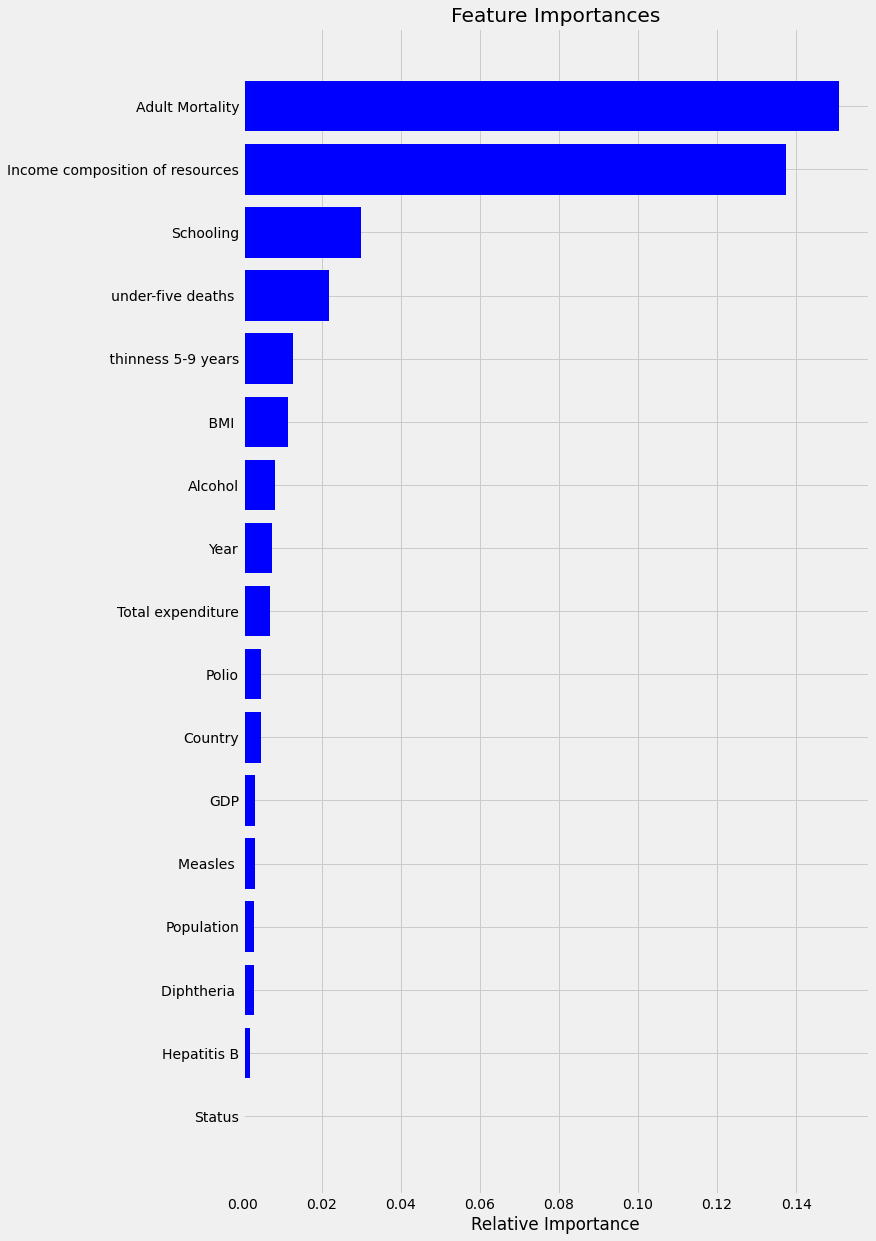

In [ ]:
features = np.array(X_train.columns)

importances = reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
nf = 50
plt.barh(range(len(indices))[-nf:-1], importances[indices][-nf:-1], color='b', align='center')
plt.yticks(range(len(indices))[-nf:-1], features[indices][-nf:-1])
plt.xlabel('Relative Importance')

# Interprétation

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 18.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491620 sha256=943b6f2f462f1f3bdd5fbc95eb07ed305b8abcbb75b3c30fd14802b97b368918
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

explainer = shap.TreeExplainer(reg)

In [ ]:
#on calcule les shapley values de notre modèle

shap_values = explainer.shap_values(X_test)
pd.DataFrame(shap_values, columns=X_test.columns).head(5)

,Country,Status,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.023972,-0.001125,0.021764,-8.989197,0.038019,0.003461,-0.082316,0.646380,-0.400972,0.151463,0.039578,0.075521,-15.972782,0.193952,0.171574,-0.372344,5.454401,0.688813,0.0,0.0,0.0
1,-0.034327,0.000177,0.033839,-9.487525,0.072630,0.002922,-0.068809,0.561914,-0.502531,0.147855,-0.294936,0.086485,-15.965847,0.174211,0.133738,-0.372706,5.459388,0.691684,0.0,0.0,0.0
2,0.080582,0.000185,0.107960,-9.453609,0.068591,0.002533,-0.060738,0.667428,-0.476810,0.147965,-0.290245,0.081111,-16.316187,0.187524,0.141326,-0.381874,5.553239,0.691182,0.0,0.0,0.0
3,0.000904,-0.001534,-0.000383,-9.304084,0.048768,-0.002300,-0.061388,0.516898,-0.432446,0.146502,-0.119141,0.081866,-16.335162,0.186775,0.031381,-0.365836,5.455457,0.666885,0.0,0.0,0.0
4,-0.083340,-0.001186,0.034217,-9.417427,0.068581,0.005626,-0.058192,0.552543,-0.454525,0.149241,-0.293688,0.089563,-16.380464,0.176904,0.032812,-0.364289,5.476511,0.657275,0.0,0.0,0.0


In [ ]:
shap.initjs()

#regardons les résultats pour la première ligne

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
np.argmax(y_pred), np.argmin(y_pred)

(791, 618)

In [ ]:
#on va regarder les résultats pour la valeur de prédiction la plus élevée et la valeur de prédiction la plus faible

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[791,:],X_test.iloc[791,:])

In [ ]:
#valeur minimale

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[618,:],X_test.iloc[618,:])